In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

df = pd.read_csv(r"C:\Users\Vadivu\OneDrive\Desktop\AISentimentChatgpt\data\chatgpt_reviews_cleaned.csv")
df.head()


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase,clean_review
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No,every quite sense including six lot never effe...
1,2025-03-07,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes,ask develop bag also worker pas expert white a...
2,2024-01-01,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No,customer address region try near risk next gir...
3,2024-01-01,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No,television loss election small detail red son ...
4,2024-01-01,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No,pas share must amount lot per manage world mak...


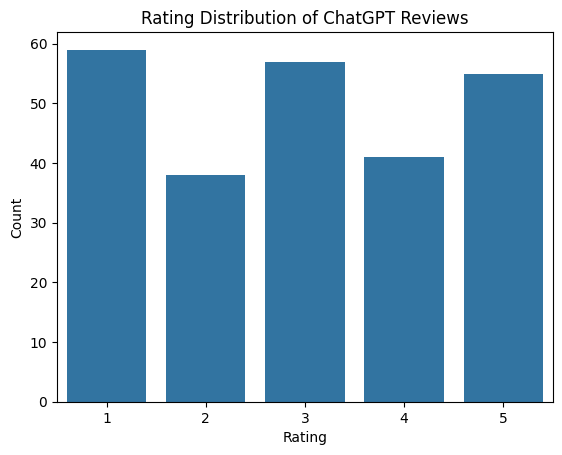

In [4]:
sns.countplot(x='rating', data=df)
plt.title('Rating Distribution of ChatGPT Reviews')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


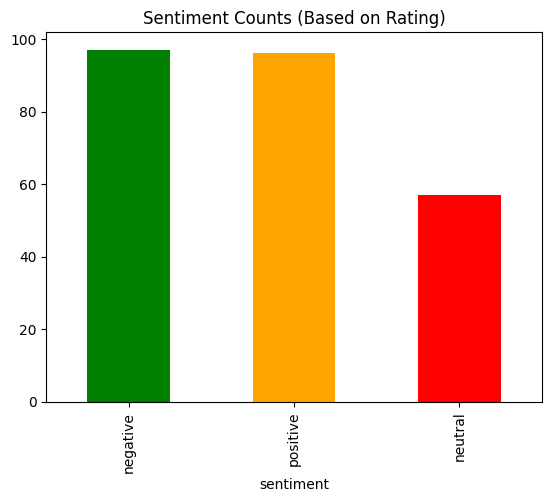

In [5]:
def rating_to_sentiment(r):
    if r >= 4: return 'positive'
    elif r == 3: return 'neutral'
    else: return 'negative'

df['sentiment'] = df['rating'].apply(rating_to_sentiment)
df['sentiment'].value_counts().plot(kind='bar', color=['green','orange','red'])
plt.title('Sentiment Counts (Based on Rating)')
plt.show()


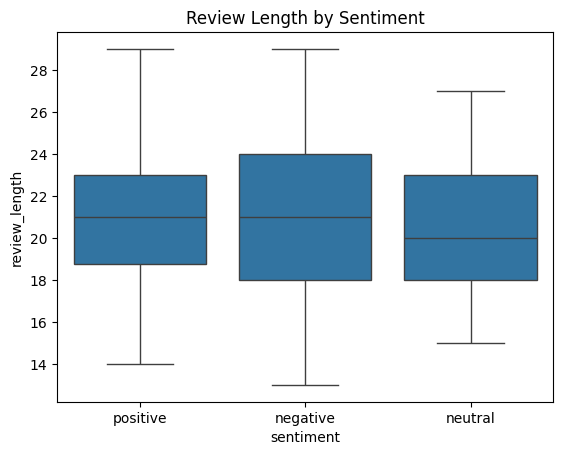

In [6]:
sns.boxplot(x='sentiment', y='review_length', data=df)
plt.title('Review Length by Sentiment')
plt.show()


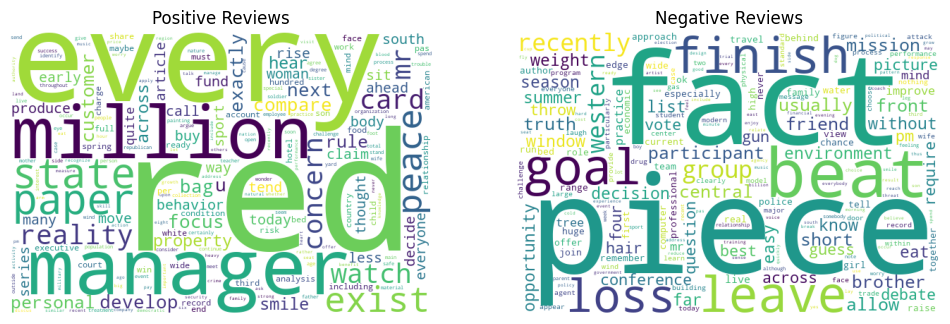

In [7]:
pos_text = ' '.join(df[df['sentiment']=='positive']['clean_review'])
neg_text = ' '.join(df[df['sentiment']=='negative']['clean_review'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=600,height=400,background_color='white').generate(pos_text))
plt.axis('off'); plt.title('Positive Reviews')

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=600,height=400,background_color='white').generate(neg_text))
plt.axis('off'); plt.title('Negative Reviews')
plt.show()


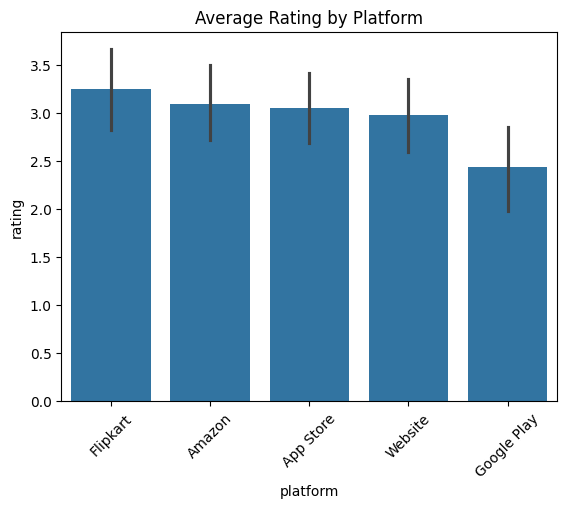

In [8]:
sns.barplot(x='platform', y='rating', data=df, estimator=lambda x: sum(x)/len(x))
plt.title('Average Rating by Platform')
plt.xticks(rotation=45)
plt.show()


C:\Users\Vadivu\AppData\Local\Temp\ipykernel_22368\2624857920.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.groupby(pd.Grouper(key='date', freq='M'))['rating'].mean()


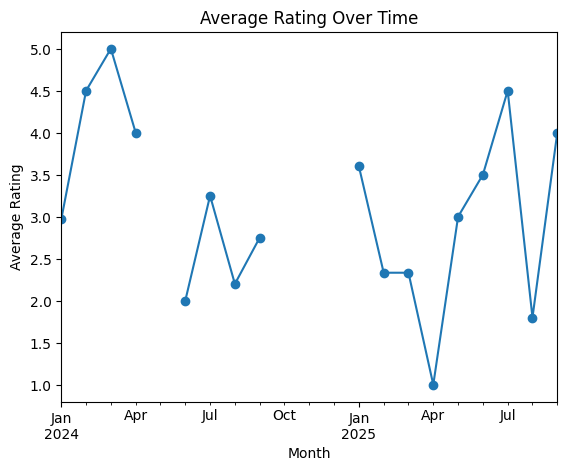

In [9]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
monthly = df.groupby(pd.Grouper(key='date', freq='M'))['rating'].mean()
monthly.plot(marker='o')
plt.title('Average Rating Over Time')
plt.xlabel('Month'); plt.ylabel('Average Rating')
plt.show()


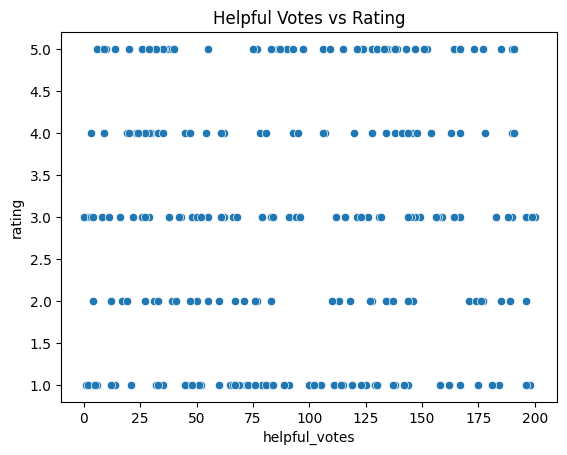

In [10]:
sns.scatterplot(x='helpful_votes', y='rating', data=df)
plt.title('Helpful Votes vs Rating')
plt.show()


In [11]:
import sys
print(sys.executable)


c:\Users\Vadivu\OneDrive\Desktop\AISentimentChatgpt\.venv\Scripts\python.exe


In [2]:
!pip install matplotlib seaborn wordcloud


  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp313-cp313-win_amd64.w